In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import norm

N = norm.cdf


def _call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * N(d1) - K * np.exp(-r * T) * N(d2)


def _put(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r * sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * np.exp(-r * T) * N(d2) - S * N(d1)


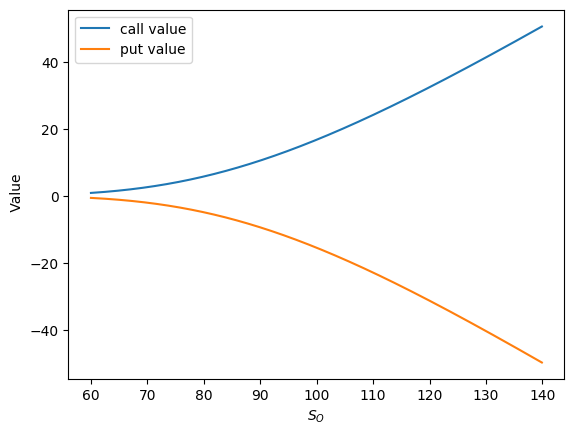

In [7]:
K = 100
r = 0.1
T = 1
sigma = 0.3

S = np.arange(60, 140, 0.1)

calls = [_call(s, K, T, r, sigma) for s in S]
puts = [_put(s, K, T, r, sigma) for s in S]
plt.plot(S, calls, label="call value")
plt.plot(S, puts, label="put value")
plt.xlabel("$S_O$")
plt.ylabel(" Value")
plt.legend()


In [14]:
# everything below is a temporary detour from financial theory with python 2021, yves hilpisch


print(f"T = {11/365}")
print(f"T = {11//365}")
print(f"T = {11 % 365}")
print(f"T = {divmod(11, 365)}")


T = 0.030136986301369864
T = 0
T = 11
T = (0, 11)


In [5]:
S0 = 143
r = 0.055
sigma = 0.3
T = 11 / 365
I = 1_000


In [6]:
rng = np.random.default_rng(100)
ST = S0 * np.exp((r - sigma**2 / 2) * T + sigma * np.sqrt(T) * rng.standard_normal(I))


In [7]:
ST[:8].round(1)


array([134.7, 145.2, 149. , 147.2, 136.1, 151.2, 148.4, 148.4])

In [8]:
ST.mean()


143.57092505735926

In [9]:
S0 * np.exp(r * T)


143.23722394635507

In [11]:
from pylab import mpl, plt
import seaborn as sns

sns.set_style("darkgrid")
# plt.style.use("seaborn")
mpl.rcParams["savefig.dpi"] = 300
mpl.rcParams["font.family"] = "serif"


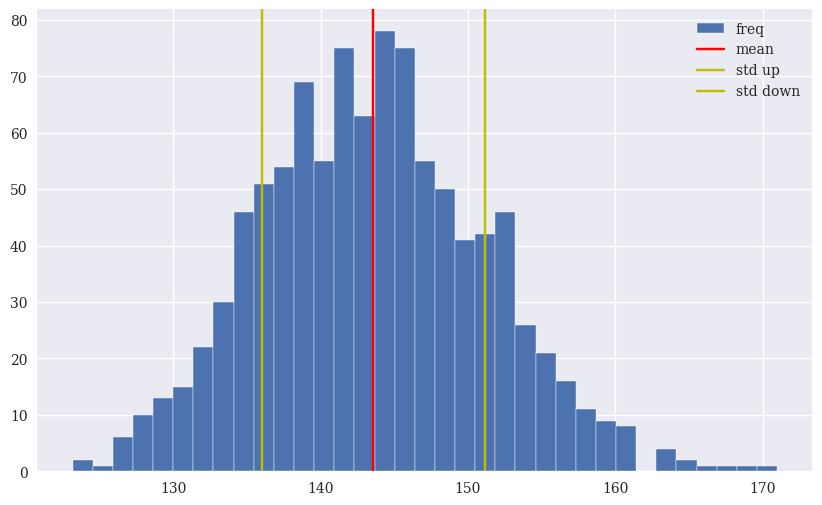

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(ST, bins=35, label="freq")
plt.axvline(ST.mean(), color="r", label="mean")
plt.axvline(ST.mean() + ST.std(), color="y", label="std up")
plt.axvline(ST.mean() - ST.std(), color="y", label="std down")
plt.legend(loc=0)
